# Some data exploration

In [28]:
import umap
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib as mpl
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

/Users/frederikrogge/miniforge3/envs/compsci-project/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load data

Load all relevant traces and the stimulus data here.

In [7]:
subject = 'KKL366'
session = '220124'
region = 'POR'
run = '002'
framerate = 30.9

base_path = '/Users/frederikrogge/Data/data-files'
f_trace = np.load(os.path.join(base_path, '{}_{}_{}_{}_trace_f.npy'.format(subject, region, session, run)))
dff_trace = np.load(os.path.join(base_path, '{}_{}_{}_{}_trace_dff-denoised.npy'.format(subject, region, session, run)))
deconvolved_trace = np.load(os.path.join(base_path, '{}_{}_{}_{}_trace_deconvolved.npy'.format(subject, region, session, run)))
positive_stimulus = np.load(os.path.join(base_path, '{}_{}_{}_{}_positive.npy'.format(subject, region, session, run)))
negative_stimulus = np.load(os.path.join(base_path, '{}_{}_{}_{}_negative.npy'.format(subject, region, session, run)))
neutral_stimulus = np.load(os.path.join(base_path, '{}_{}_{}_{}_neutral.npy'.format(subject, region, session, run)))

### Traces

Here, we present the traces (raw fluorescence, dff, deconvolved) of a cell that shows a selective response to the positive stimulus (shown in green).


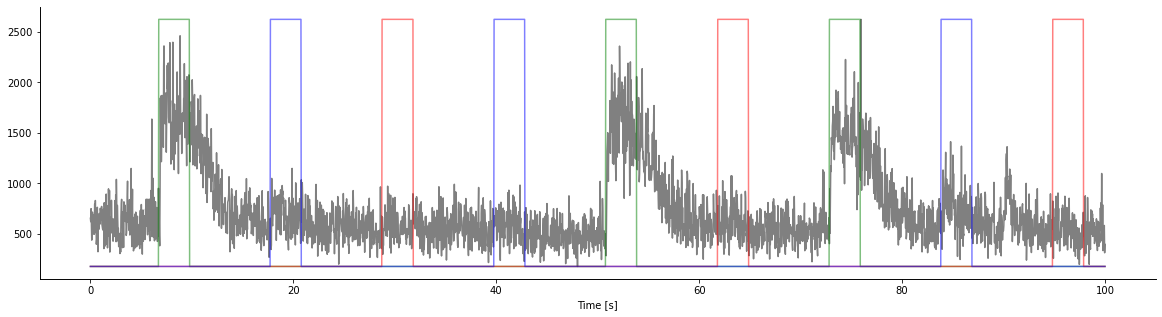

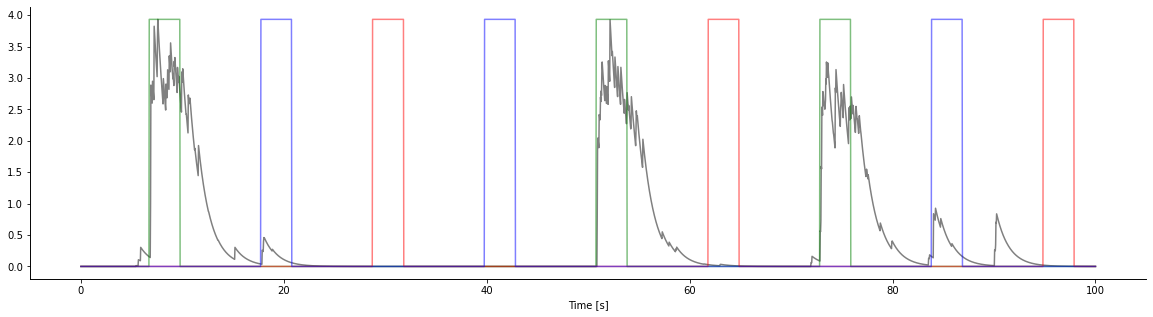

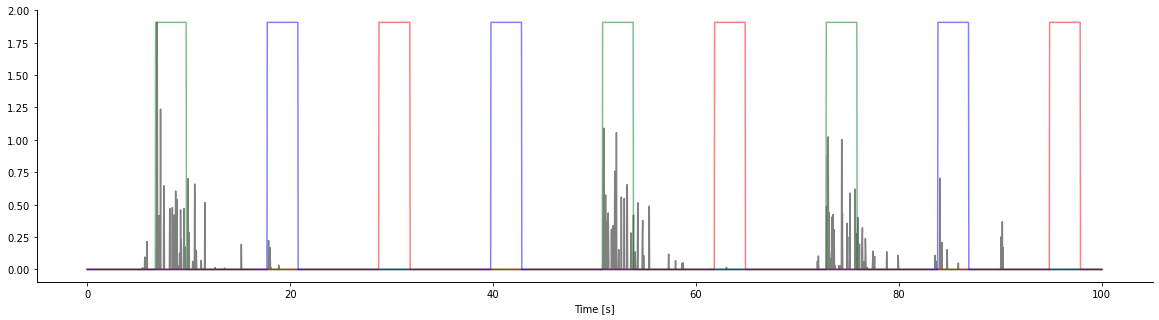

In [27]:
cell = 2

# Raw fluorescence
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(np.linspace(0, 100, 3090), f_trace[cell, 0:3090], color='grey')
ax2 = ax.twinx()
ax2.get_yaxis().set_visible(False)
ax2.plot(np.linspace(0, 100, 3090), positive_stimulus[0:3090], color='green', alpha=0.5)
ax2.plot(np.linspace(0, 100, 3090), negative_stimulus[0:3090], color='red', alpha=0.5)
ax2.plot(np.linspace(0, 100, 3090), neutral_stimulus[0:3090], color='blue', alpha=0.5)
ax.set_xlabel('Time [s]')
plt.show()

# dF/F
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(np.linspace(0, 100, 3090), dff_trace[cell, 0:3090], color='grey')
ax2 = ax.twinx()
ax2.get_yaxis().set_visible(False)
ax2.plot(np.linspace(0, 100, 3090), positive_stimulus[0:3090], color='green', alpha=0.5)
ax2.plot(np.linspace(0, 100, 3090), negative_stimulus[0:3090], color='red', alpha=0.5)
ax2.plot(np.linspace(0, 100, 3090), neutral_stimulus[0:3090], color='blue', alpha=0.5)
ax.set_xlabel('Time [s]')
plt.show()

# Deconvolved
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(np.linspace(0, 100, 3090), deconvolved_trace[cell, 0:3090], color='grey')
ax2 = ax.twinx()
ax2.get_yaxis().set_visible(False)
ax2.plot(np.linspace(0, 100, 3090), positive_stimulus[0:3090], color='green', alpha=0.5)
ax2.plot(np.linspace(0, 100, 3090), negative_stimulus[0:3090], color='red', alpha=0.5)
ax2.plot(np.linspace(0, 100, 3090), neutral_stimulus[0:3090], color='blue', alpha=0.5)
ax.set_xlabel('Time [s]')
plt.show()

### Classes

Next, we want to visualize the classes using umap to reduce the dimensions.

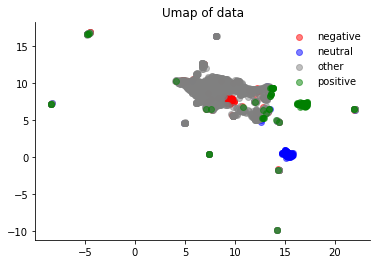

In [36]:
base_path = '/Users/frederikrogge/Data/compsci-project'
ident = 'KKL366_220124_dff-denoised'
colors = {
    'other': 'grey',
    'positive': 'green',
    'negative': 'red',
    'neutral': 'blue'
}

data = np.load(os.path.join(base_path, ident + '_data.npy'), allow_pickle=True)
labels = np.load(os.path.join(base_path, ident + '_labels.npy'), allow_pickle=True)

data = np.max(data, axis=-1)

reducer = umap.UMAP()
embedding = reducer.fit_transform(data)

fig, ax = plt.subplots()
for i, l in enumerate(np.unique(labels)):
    args = np.argwhere(labels == l).squeeze()
    ax.scatter(embedding[args, 0], embedding[args, 1], c=colors[l], alpha=0.5, label=l)
plt.legend(frameon=False)
ax.set_title('Umap of data')
plt.show()